In [1]:
import numpy as np
import matplotlib.pyplot as plt
import paq.raices as rts
%matplotlib inline

In [2]:
def deriv_num(func,x_0, h=1e-4):
    return (-func(x_0+2*h)+8*func(x_0+h)-8*func(x_0-h)+func(x_0-2*h))/(12.*h)

In [3]:
def Newton_Raphson(func,x_0, err = 1e-8):
    count = 0
    while abs(func(x_0)) >= err:
        root = x_0 - func(x_0)/deriv_num(func,x_0)
        x_0 = root
        count += 1
    return [root, count]

Queremos encontrar las raices de la función
$$ f(<\sigma>) = \sigma - \tanh \left(\frac{T_c}{T} <\sigma> \right)$$
con $T_c = \frac{qJ}{k_B }$
resolveremos para $T$ en términos de $ T_c$.

In [4]:
def resta(s):
    return  s - np.tanh(s / T)
def dresta(s):
    return 1 - 1/(T * (np.cosh(s/T)*np.cosh(s/T)))

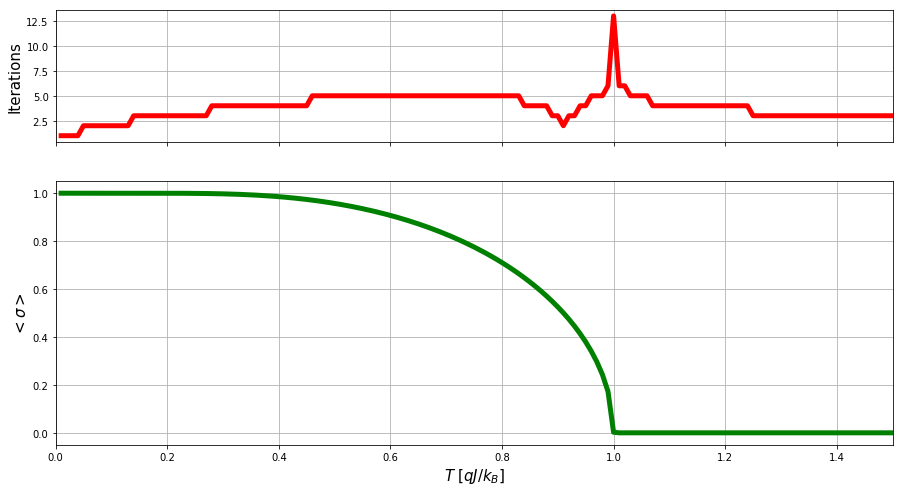

In [5]:
temp = np.arange(0.01,1.51,.01)
roots = []
iterations = []

fig, axs = plt.subplots(2, figsize=(15,8), sharex = True, gridspec_kw={'height_ratios': [1, 2]})
axs[0].grid(True)
axs[1].grid(True)

axs[1].set_xlabel(r"$T\; [qJ/k_B]$",fontsize = 15)
axs[0].set_ylabel("Iterations",fontsize = 15)
axs[1].set_ylabel(r"$<\sigma>$",fontsize = 15)
axs[1].set_xlim([0,1.5])
#ax.set_ylim([-.1,1.1])


for i in range(0,len(temp)):
    T = temp[i]     
    [rt, count] = Newton_Raphson(resta,.5)
    roots.append(rt)
    iterations.append(count)
axs[1].plot(temp,roots, color = 'g', lw = 5)
axs[0].plot(temp,iterations, color = 'r', lw = 5)
plt.show()

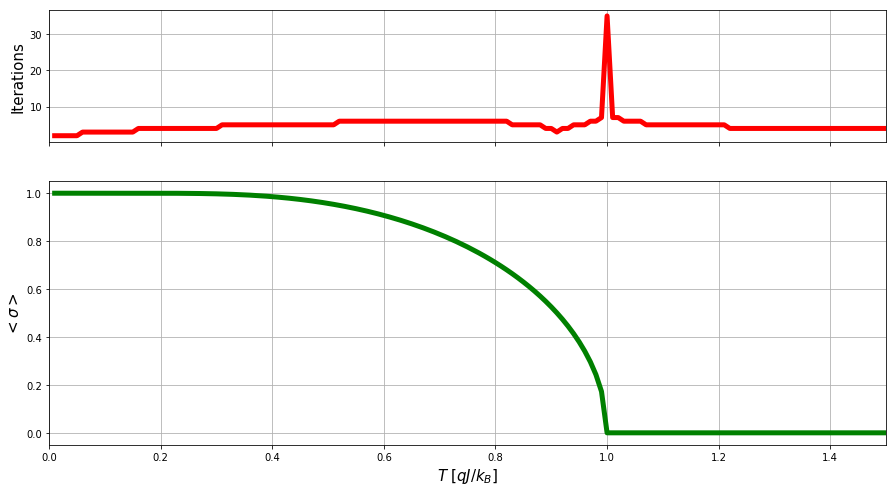

In [6]:
temp = np.arange(0.01,1.51,.01)
roots = []
iterations = []

fig, axs = plt.subplots(2, figsize=(15,8), sharex = True, gridspec_kw={'height_ratios': [1, 2]})
axs[0].grid(True)
axs[1].grid(True)

axs[1].set_xlabel(r"$T\; [qJ/k_B]$",fontsize = 15)
axs[0].set_ylabel("Iterations",fontsize = 15)
axs[1].set_ylabel(r"$<\sigma>$",fontsize = 15)
axs[1].set_xlim([0,1.5])
#ax.set_ylim([-.1,1.1])


for i in range(0,len(temp)):
    T = temp[i]     
    [rt, count] = rts.newton_raphson(resta, dresta, .5, iteration_num = True)
    roots.append(rt)
    iterations.append(count)
axs[1].plot(temp,roots, color = 'g', lw = 5)
axs[0].plot(temp,iterations, color = 'r', lw = 5)
plt.show()

Y ahora consideremos un campo magnético $B$, fijando distintas temperaturas debajo y sobre la crítica, entonces queremos las raices de 
$$ f(<\sigma>) = <\sigma> - \tanh \left( \frac{T_c}{T} \left(\frac{B}{B_c} + <\sigma> \right)  \right) $$
e igual que antes, se resolverá en términos de $T_c = \frac{qJ}{k_B} $ y de  $B_c = \frac{\mu}{qJ}$

In [7]:
def resta(s):
    return  s - np.tanh( (B + s)/ T)

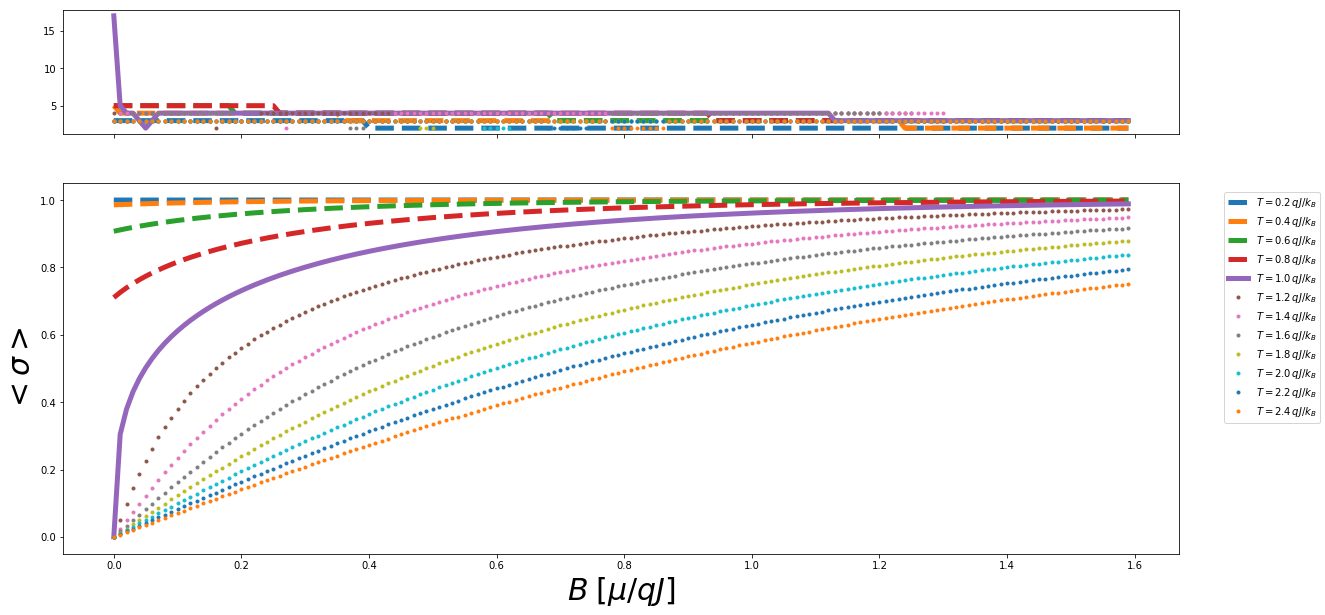

In [8]:
temp = np.arange(.2,2.6,.2)
magne = np.arange(0.,1.6,.01)

fig, axs = plt.subplots(2, figsize=(20,10), sharex = True, gridspec_kw={'height_ratios': [1, 3]})
axs[0].grid(True)
axs[1].grid(True)

for i in range(0,len(temp)):
    T = temp[i]
    roots = []
    iterations = []
    if T < 1:
        for j in range(0,len(magne)):
            B = magne[j]
            [rt, count] = Newton_Raphson(resta,.5, 1e-10)
            roots.append(rt)
            iterations.append(count)
        axs[0].plot(magne, iterations, '--', lw = 5)
        axs[1].plot(magne,roots,'--', lw = 5, label="$T=%s \,qJ/k_B$"%(str(T))   )
        
    elif T == 1:
        for j in range(0,len(magne)):
            B = magne[j]
            [rt, count] = Newton_Raphson(resta,.5, 1e-10)
            roots.append(rt)
            iterations.append(count)
        axs[0].plot(magne, iterations, lw = 5)
        axs[1].plot(magne,roots, lw = 5, label="$T=%s \,qJ/k_B$"%(str(T))   )
    else:
        for j in range(0,len(magne)):
            B = magne[j]
            [rt, count] = Newton_Raphson(resta,.5, 1e-10)
            roots.append(rt)
            iterations.append(count)
        axs[0].plot(magne, iterations, '.', lw = 5)
        axs[1].plot(magne,roots, '.',lw = 5, label="$T=%s \,qJ/k_B$"%(str(T))   )
        

fig.legend(loc='right')
axs[1].set_xlabel(r'$B\; [\mu/qJ]$',fontsize=30), 
axs[1].set_ylabel(r'$<\sigma>$',fontsize = 30)
axs[1].grid()
axs[0].grid()
plt.show()